The dataset contains a high ratio of categorical variables/features. Overview on different datatypes:<br>
https://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/

In [155]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
#source of dataset: http://archive.ics.uci.edu/ml/datasets/Student+Performance
#target variable: G3 (performance of students in portuguese)
df = pd.read_csv('student/student-por.csv', sep=";")

In [157]:
#change delimiter from semicolon to comma
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [158]:
#number of rows and columns
df.shape

(649, 33)

In [159]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<b>ideas</b>
* any missing values？ --> no
* get average performance of males and females --> females perform better than males
* get average performance of students with different PSTATUS --> no difference
* binary features: leave it like that, one-hot encoding or change values to 0 and 1?
* what to do with 'object' values? change to categorical values?
* which features first, which later?
* get average performance of students with different dalc --> performance decreases with increasing alcohol consumption
* test distribution of target variable



In [160]:
#unify column names (lower letters)
df.columns = df.columns.str.lower()

In [161]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [162]:
#get average performance of males and females
df.groupby(['sex'])['g3'].mean()

sex
F    12.253264
M    11.406015
Name: g3, dtype: float64

In [163]:
#get average performance of students with different pstatus 
df.groupby(['pstatus'])['g3'].mean()

pstatus
A    11.912500
T    11.905097
Name: g3, dtype: float64

In [164]:
#get average performance of students with different alcohol cosnumption during work day 
df.groupby(['dalc'])['g3'].mean()

dalc
1    12.299335
2    11.363636
3    11.139535
4     8.941176
5    10.235294
Name: g3, dtype: float64

In [165]:
df['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
pstatus       649 non-null object
medu          649 non-null int64
fedu          649 non-null int64
mjob          649 non-null object
fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
dalc          649 no

In [167]:
#split dataet in training, validation and testong part
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


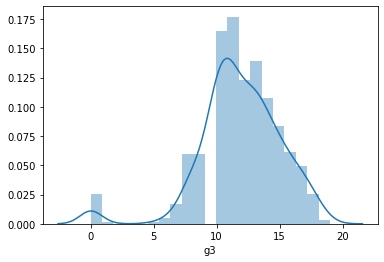

In [168]:
#check distribution of target values
#--> no logarithm required
sns.distplot(df.g3)

In [169]:
del df_train['g3']
del df_val['g3']
del df_test['g3']

In [170]:
#define first numeric features
features = ['age', 'absences']

In [171]:
# 1st: do one hot encoding
# 2nd: get a matrix array with 'values'
def prepare_X(df):
    df = df.copy()
    for v in ['GP', 'MS']:
        #give feature useful name, e.g. 'school_GP' if the school is Gabriel Pereira
        feature = 'school_%s' % v
        #create one-hot encoding feature
        #here a new pandas series is created (school)
        #astype(int) gives a 1 for True and a 0 for False
        value = (df['school'] == v).astype(int)
        #add the feature back to the df, using the feature name
        df[feature] = value
        features.append(feature)
    
    for v in ['F', 'M']:
        feature = 'sex_%s' % v
        df[feature] = (df['sex'] == v).astype(int)

        features.append(feature)
    
    df_num = df[features]
    #X = df_num.values
    return df_num


In [172]:
prepare_X(df_train)

,age,absences,school_GP,school_MS,sex_F,sex_M
37,16,4,1,0,0,1
440,16,0,0,1,0,1
397,17,18,1,0,1,0
344,18,0,1,0,0,1
248,16,2,1,0,0,1
...,...,...,...,...,...,...
596,17,0,0,1,1,0
489,18,0,0,1,0,1
186,17,0,1,0,0,1
283,16,4,1,0,0,1
